<a href="https://colab.research.google.com/github/gururatnaupadhyay-droid/WIDS_HANDWRITTEN-DIGIT-RECONGNITION/blob/main/logistic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LOGISTIC REGRESSION
In this assignment we try to find a relation between average weight of granules and total surface area to see if a material is viable as a catalyst

In [361]:
# Importing libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Feature mapping
Sometimes, we are given an inadequate number of features for which training the dataset becomes difficult.  
Hence we create new features of by taking polynomial products of existing ones.

In [362]:
# Generates new features by taking products of various powers of the input features (x and y)
# This expands the feature space with polynomial combinations (up to degree 4) of x and y

### TODO 1
def feature_map(points):
    points = np.array(points)
    x, y = points[:, 0], points[:, 1]

    features = []

    features.append(x**4)
    features.append(x**3*y)
    features.append(x**2*y**2)
    features.append(x*y**3)
    features.append(y**4)
    features.append(x**3)
    features.append(x**2*y)
    features.append(x*y**2)
    features.append(y**3)
    features.append(x**2)
    features.append(x*y)
    features.append(y**2)

    features.append(y)
    features.append(x)



    return np.column_stack(features)

### Creating the class for Logistic Regression

In [363]:
import numpy as np

# Our class in which we define all functions
class LogisticRegression:

    # Constructor
    def __init__(self) -> None:
        self.weights: np.ndarray | None = None
        self.bias: float | None = None

    # Sigmoid function
    def __sigmoid(self, z):
      z = np.clip(z, -500, 500)
      return 1 / (1 + np.exp(-z))


    # Returns probabilities of being class 1
    def predict_probability(self, X: np.ndarray) -> np.ndarray:
        z = np.dot(X, self.weights) + self.bias
        return self.__sigmoid(z)

    # Returns class labels (0 or 1)
    def predict(self, X: np.ndarray) -> np.ndarray:
        probs = self.predict_probability(X)
        return (probs >= 0.5).astype(int)

    # Returns loss, gradient of weights (dw), gradient of bias (db)
    def __loss(self, X: np.ndarray, y: np.ndarray, lambda_reg: float = 0) -> tuple:
        m = X.shape[0]
        y_hat = self.predict_probability(X)

        # Logistic (cross-entropy) loss
        loss = -np.mean(
            y * np.log(y_hat + 1e-15) +
            (1 - y) * np.log(1 - y_hat + 1e-15)
        )

        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = np.mean(y_hat - y)

        # L2 Regularization
        loss += (lambda_reg / (2 * m)) * np.sum(self.weights ** 2)
        dw += (lambda_reg / m) * self.weights

        return loss, dw, db

    # Train the model using gradient descent
    def fit(
        self,
        X: np.ndarray,
        y: np.ndarray,
        epochs: int = 500,
        learning_rate: float = 0.01,
        threshold: float = 0.0001,
        lambda_reg: float = 1
    ) -> None:

        # Initialize parameters
        n_features = X.shape[1]
        self.weights = np.random.randn(n_features)
        self.bias = 0.0

        prev_loss = float("inf")

        # Gradient Descent
        for _ in range(epochs):
            loss, dw, db = self.__loss(X, y, lambda_reg)

            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            # Early stopping
            if abs(prev_loss - loss) < threshold:
                break

            prev_loss = loss


In [364]:
# Importing data
df = pd.read_csv('logistic_data.csv')
data = df.to_numpy()
X = data[:, :2]
y = data[:, 2]

In [365]:
# Creating train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [366]:
import numpy as np

# z-score standardization
def z_score(X: np.ndarray) -> tuple:
    # Mean of each feature (column-wise)
    x_mean = np.mean(X, axis=0)

    # Standard deviation of each feature (column-wise)
    x_std = np.std(X, axis=0)

    # Avoid division by zero
    x_std[x_std == 0] = 1

    # Standardize
    x = (X - x_mean) / x_std

    return x_mean, x_std


In [367]:
# Normalizing the data (we use the same constants to maintain consistency)

x_train = feature_map(X_train)
x_test = feature_map(X_test)


x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std


In [368]:
# Visualizing how the boundary curve looks like
def plot_decision_boundary(X_original, y, model, resolution=500):
    # Set up the grid for the decision boundary
    x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
    y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Flatten the grid points and map to expanded features
    grid_original = np.c_[xx.ravel(), yy.ravel()]
    grid_expanded = feature_map(grid_original)

    # Predict the grid values for decision boundary
    Z = model.predict(grid_expanded)
    Z = Z.reshape(xx.shape)

    # Plot the data points
    true_points = X_original[y == 1]
    false_points = X_original[y == 0]
    plt.scatter(true_points[:, 0], true_points[:, 1], label="True", c="blue", marker="o", s=20)
    plt.scatter(false_points[:, 0], false_points[:, 1], label="False", c="red", marker="x", s=20)

    # Plot the decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)

    # Labeling and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary and Data Points")
    plt.show()

We plot the decision boundary that the model predicts. This can be used to check for overfitting.  
If the boundary starts looking like an ameoba trying to fit every point, then it is a sign of overfitting.

Your model has an accuracy of 75.00%


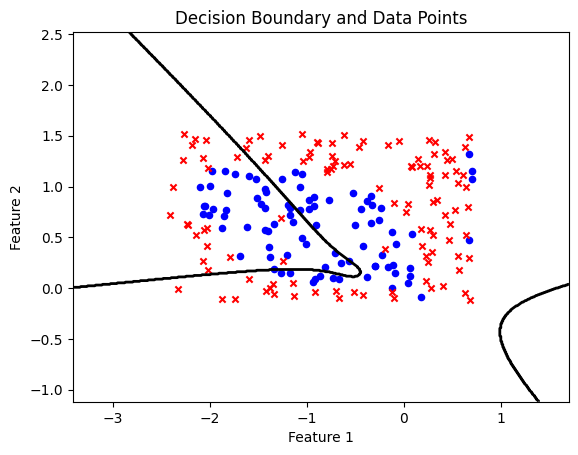

70.625 75.0


In [369]:
# Checking accuracy of test model
model = LogisticRegression()

model.fit(
    x_train,
    y_train,
    epochs=4000,
    learning_rate=0.01,
    threshold=1e-4,
    lambda_reg=0.001
)

y_pred = model.predict(x_test)

accuracy = np.mean(y_pred == y_test) * 100
print(f"Your model has an accuracy of {accuracy:.2f}%")



# Plotting the contour and checking for overfitting
plot_decision_boundary(((X - np.mean(X_train)) / np.std(X_train)), y, model)


train_acc = np.mean(model.predict(x_train) == y_train) * 100
test_acc = np.mean(model.predict(x_test) == y_test) * 100

print(train_acc, test_acc)

